<a href="https://colab.research.google.com/github/Dotunbey/Deeplearning_with_Rosssman_store_sales/blob/main/Deeplearning_with_Rosssman_store_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()  # this opens a file chooser to upload files
import pandas as pd
train = pd.read_csv("train.csv")

Saving store.csv to store.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


/tmp/ipython-input-3785561033.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train = pd.read_csv('train.csv',low_memory=False)
store = pd.read_csv('store.csv',low_memory=False)
test = pd.read_csv('test.csv',low_memory=False)

train = pd.merge(train,store,how='left',on='Store')
test = pd.merge(test,store,how='left',on='Store')

In [7]:
test.shape
train.shape

(1017209, 18)

In [8]:
print("Missing values in train dataframe:")
print(train.isnull().sum())
print("\nMissing values in test dataframe:")
print(test.isnull().sum())

Missing values in train dataframe:
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

Missing values in test dataframe:
Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday           

In [9]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
def split_date(df):
    # Convert 'Date' column to datetime objects
    df['Date'] = pd.to_datetime(df['Date'])
    # Extract year, month, day, and week of the year
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

split_date(train)
split_date(test)

In [11]:
train = train[train.Open == 1].copy()

In [12]:
# Define a function to calculate the duration of competition in months
def comp_months(df):
    # Calculate the number of months since the competition opened
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    # If the competition opened in the future, set the duration to 0. Fill any NaNs with 0.
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

comp_months(train)
comp_months(test)

In [14]:
# Transpose the DataFrame to view all columns for a few rows
train.head().T

,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1
StoreType,c,a,a,c,a


In [15]:
 #Helper function to check if the current month is a Promo2 month
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        # Get the list of promo months (e.g., ['Jan', 'Apr', ...])
        months = (row['PromoInterval'] or '').split(',')
        # Check if the store has Promo2 and if the current month is in the list
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

# Main function to create promotion-related columns
def promo_cols(df):
    # Calculate months since Promo2 was active
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) + (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    # Set to 0 if negative and fill NaNs. Only keep the value if Promo2 is active for the store.
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']

    # Check if the current month is a promotion month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']
# Apply the promotion feature engineering to both datasets
promo_cols(train)
promo_cols(test)

In [18]:
# Define the columns we will use as inputs (features) and the target variable
input_cols = ['Store', 'DayOfWeek', 'Promo',
        'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
        'CompetitionDistance', 'Promo2', 'Year', 'Month', 'Day',
        'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'
inputs = train[input_cols].copy()
targets = train[target_col].copy()
# Create the input DataFrame for the test set
test_inputs = test[input_cols].copy()
# Separate columns into numerical and categorical types
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']
numeric_cols = list(set(input_cols) - set(categorical_cols))

inputs[numeric_cols].isna().sum()

,0
Year,0
IsPromo2Month,0
WeekOfYear,0
SchoolHoliday,0
Month,0
Day,0
Promo2,0
Promo2Open,0
CompetitionOpen,0
CompetitionDistance,2186


In [20]:
# Get the maximum competition distance
max_dist = inputs.CompetitionDistance.max()
# Fill missing values with a value larger than any existing distance
inputs['CompetitionDistance'].fillna(max_dist*2, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_dist*2, inplace=True)

/tmp/ipython-input-37974142.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inputs['CompetitionDistance'].fillna(max_dist*2, inplace=True)
/tmp/ipython-input-37974142.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [21]:
# Import the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Initialize the scaler
scaler = MinMaxScaler()
# Fit the scaler on the training data's numeric columns
scaler.fit(inputs[numeric_cols])

MinMaxScaler()

In [22]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [24]:
# Import the OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# Ensure categorical columns are of string type for the encoder
inputs[categorical_cols] = inputs[categorical_cols].astype(str)
test_inputs[categorical_cols] = test_inputs[categorical_cols].astype(str)
# Initialize the encoder. sparse=False returns a numpy array. handle_unknown='ignore' prevents errors on unseen test data categories.
encoder = OneHotEncoder(handle_unknown='ignore')
# Fit the encoder on the training data's categorical columns
encoder.fit(inputs[categorical_cols])

OneHotEncoder(handle_unknown='ignore')

In [28]:
# Get the names of the new encoded columns
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

# Transform the categorical columns into a DataFrame
inputs_encoded = pd.DataFrame(encoder.transform(inputs[categorical_cols]).toarray(), columns=encoded_cols, index=inputs.index)
test_inputs_encoded = pd.DataFrame(encoder.transform(test_inputs[categorical_cols]).toarray(), columns=encoded_cols, index=test_inputs.index)

# Concatenate the numerical and encoded categorical features
X = pd.concat([inputs[numeric_cols], inputs_encoded], axis=1)
X_test = pd.concat([test_inputs[numeric_cols], test_inputs_encoded], axis=1)

In [33]:
targets

,Sales
0,5263
1,6064
2,8314
3,13995
4,4822
...,...
1016776,3375
1016827,10765
1016863,5035
1017042,4491


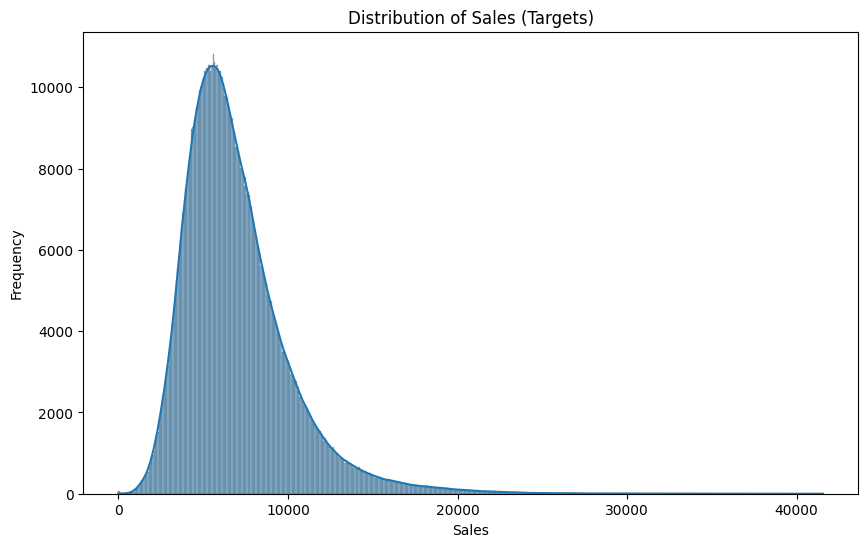

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(targets, kde=True)
plt.title('Distribution of Sales (Targets)')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets (e.g., 80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, targets, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (675513, 30)
Shape of X_val: (168879, 30)
Shape of y_train: (675513,)
Shape of y_val: (168879,)


In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)), # Input layer and first hidden layer
    Dense(64, activation='relu'), # Second hidden layer
    Dense(1) # Output layer for regression (predicting sales)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
21110/21110 ━━━━━━━━━━━━━━━━━━━━ 87s 4ms/step - loss: 10892712.0000 - mae: 2344.0872 - val_loss: 7384875.0000 - val_mae: 1999.2628
Epoch 2/50
21110/21110 ━━━━━━━━━━━━━━━━━━━━ 78s 4ms/step - loss: 7328275.0000 - mae: 1973.0811 - val_loss: 7255604.0000 - val_mae: 1966.7671
Epoch 3/50
21110/21110 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - loss: 7267709.0000 - mae: 1960.2367 - val_loss: 7147973.5000 - val_mae: 1934.8408
Epoch 4/50
21110/21110 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - loss: 7087894.5000 - mae: 1935.7570 - val_loss: 7087647.0000 - val_mae: 1948.8351
Epoch 5/50
21110/21110 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - loss: 7026333.5000 - mae: 1928.4646 - val_loss: 7030611.5000 - val_mae: 1930.0387
Epoch 6/50
21110/21110 ━━━━━━━━━━━━━━━━━━━━ 72s 3ms/step - loss: 7029318.5000 - mae: 1923.9985 - val_loss: 6999664.0000 - val_mae: 1909.7096
Epoch 7/50
21110/21110 ━━━━━━━━━━━━━━━━━━━━ 72s 3ms/step - loss: 6986288.5000 - mae: 1916.7302 - val_loss: 6941885.0000 - val_mae: 1910.0854
Epoch 8/50
2